In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("spam.csv", encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.tail()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [13]:
df.shape

(5572, 5)

# 1. Data Clenaing:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
#dropping columns 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [16]:
df.sample(5)


,v1,v2
2099,spam,"SMS SERVICES. for your inclusive text credits,..."
4465,ham,Hey u still at the gym?
4823,ham,Not thought bout it... || Drink in tap & spile...
3802,ham,Yup song bro. No creative. Neva test quality. ...
5075,ham,"Well, i'm glad you didn't find it totally disa..."


In [17]:
#renamimg the columns
df.rename(columns={'v1':'target','v2':'text'},inplace='True')
df.sample(5)

,target,text
359,ham,"Hello! Just got here, st andrews-boy its a lon..."
1975,ham,Delhi and chennai still silent.
203,ham,Goodmorning sleeping ga.
2472,spam,Final Chance! Claim ur å£150 worth of discount...
4505,ham,When are you guys leaving?


In [18]:
#target variable converting to numeric variable
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [19]:
df["target"]=encoder.fit_transform(df["target"])

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
#missing values:
df.isnull().sum()

target    0
text      0
dtype: int64

In [22]:
#check for duplicate values:
df.duplicated().sum()

403

In [23]:
#remove duplicated:
df=df.drop_duplicates(keep="first")

In [24]:
df.duplicated().sum()

0

In [25]:
df.shape

(5169, 2)

# 2.EDA:Exploritary data analysis

In [26]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

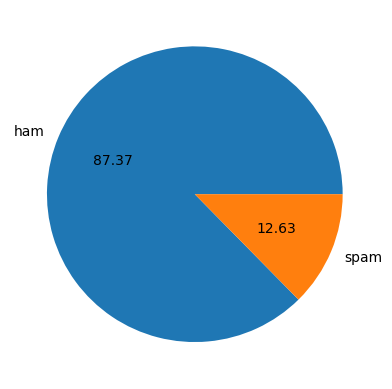

In [28]:
plt.pie(df['target'].value_counts(),labels=["ham",'spam'],autopct='%0.2f')
plt.show()

In [29]:
#data is imbalenced


In [30]:
import nltk

In [31]:
!pip install nltk

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Jaykumar
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
df['No_Of_Charecters']=df["text"].apply(len)

In [34]:
df.head()

,target,text,No_Of_Charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
#calculating words in text msg
#list formed usig nltk 

df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [36]:
df['No_Of_Words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [37]:
df['No_Of_Words']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: No_Of_Words, Length: 5169, dtype: int64

In [38]:
df.head()

,target,text,No_Of_Charecters,No_Of_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [39]:
#no of setence in each text
df["No_Of_Sentence"]=df['text'].apply(lambda x:nltk.sent_tokenize(x))
df["No_Of_Sentence"].head()

0    [Go until jurong point, crazy.., Available onl...
1                     [Ok lar..., Joking wif u oni...]
2    [Free entry in 2 a wkly comp to win FA Cup fin...
3    [U dun say so early hor... U c already then sa...
4    [Nah I don't think he goes to usf, he lives ar...
Name: No_Of_Sentence, dtype: object

In [40]:
df["No_Of_Sentence"]=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df["No_Of_Sentence"]

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: No_Of_Sentence, Length: 5169, dtype: int64

In [41]:
df.head()

,target,text,No_Of_Charecters,No_Of_Words,No_Of_Sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
df[['No_Of_Charecters','No_Of_Words','No_Of_Sentence']].describe()

,No_Of_Charecters,No_Of_Words,No_Of_Sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
# for ham:
df[df['target']==0][['No_Of_Charecters','No_Of_Words','No_Of_Sentence']].describe()

,No_Of_Charecters,No_Of_Words,No_Of_Sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
df[df['target']==1][['No_Of_Charecters','No_Of_Words','No_Of_Sentence']].describe()

,No_Of_Charecters,No_Of_Words,No_Of_Sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [45]:
#visualizinng the and comparing the varibles
import seaborn as sns

C:\Users\Jaykumar Patil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jaykumar Patil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='No_Of_Charecters', ylabel='Count'>

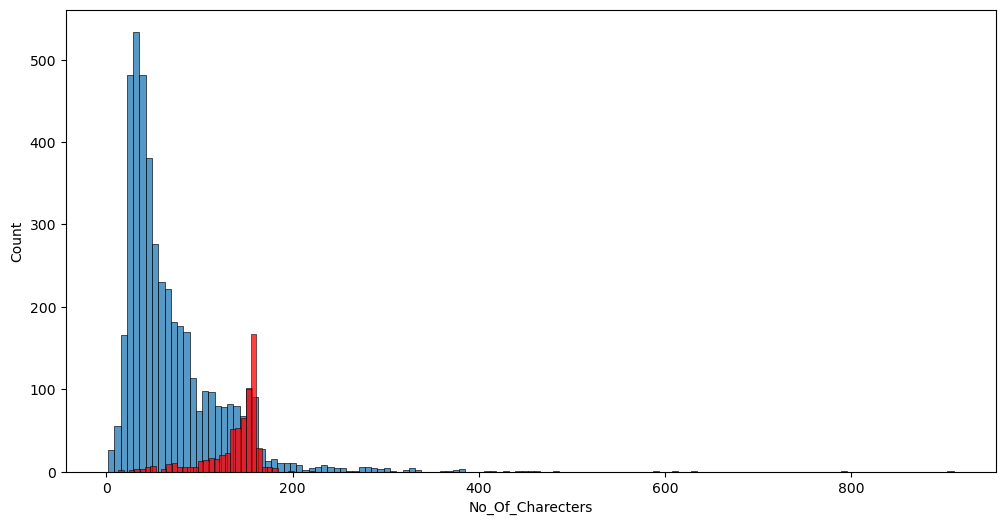

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['No_Of_Charecters'])
sns.histplot(df[df['target']==1]['No_Of_Charecters'],color='red')

C:\Users\Jaykumar Patil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jaykumar Patil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='No_Of_Words', ylabel='Count'>

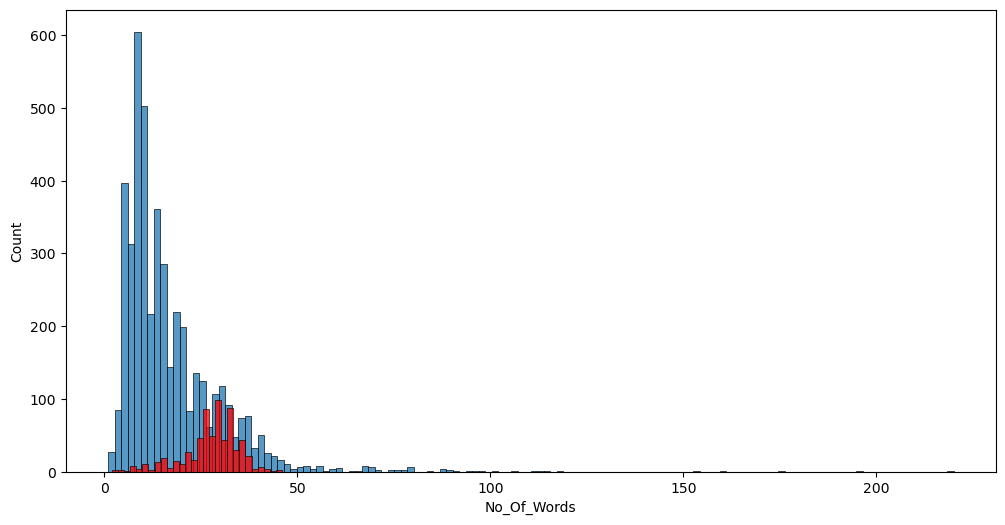

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['No_Of_Words'])
sns.histplot(df[df['target']==1]['No_Of_Words'],color='red')


C:\Users\Jaykumar Patil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jaykumar Patil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='No_Of_Sentence', ylabel='Count'>

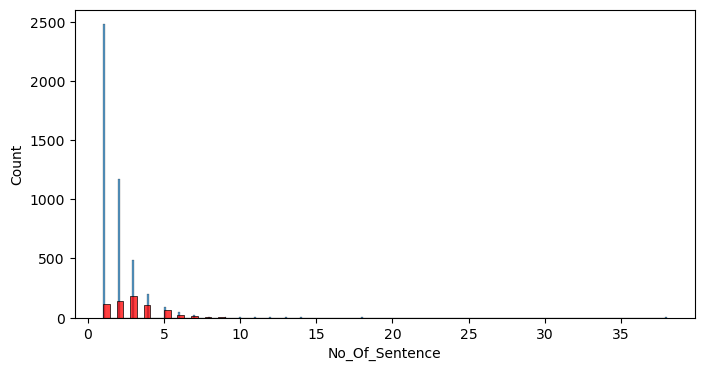

In [48]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['target']==0]['No_Of_Sentence'])
sns.histplot(df[df['target']==1]['No_Of_Sentence'],color='red')

C:\Users\Jaykumar Patil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jaykumar Patil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jaykumar Patil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


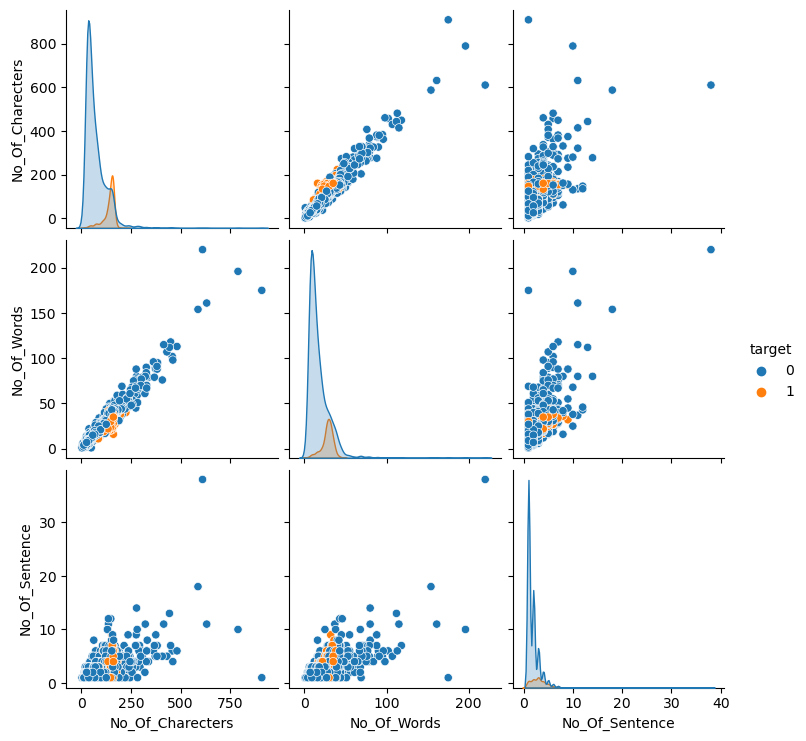

In [49]:
sns.pairplot(df,hue='target')

In [50]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

# 3.data preprocessing:

1.lower case
2.tokenisation
3.removing the special charaetcters
4.removing stop words and puncations
5.stemming

In [42]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [44]:
def transform_text(text):
    # 1.lower case
    text=text.lower()
    text=nltk.word_tokenize(text)
    
   #tokenization 
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    #stopords and punctuations
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
     
    #steamming
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return ' '.join(y)

In [45]:
transform_text('I Loved the Online Lectures On ML ,How About You')

'love onlin lectur ml'

In [46]:
text=df['text'][0]
transform_text(text)

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [47]:
text=df['text'][1]
transform_text(text)

'ok lar joke wif u oni'

In [48]:
#appling to the all the vlaues in text columns
df['transformed_text']=df['text'].apply(transform_text)


In [49]:
df.head()

,target,text,No_Of_Charecters,No_Of_Words,No_Of_Sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# creating wordcloud

it will highlight the main words in text message

In [50]:
!pip install wordcloud

In [51]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [52]:
# word cloud for spam messeges
spam_wc=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

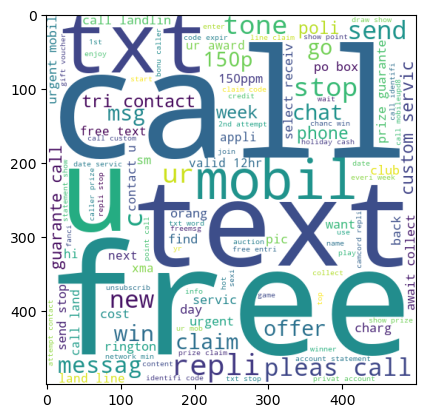

In [53]:
plt.imshow(spam_wc)

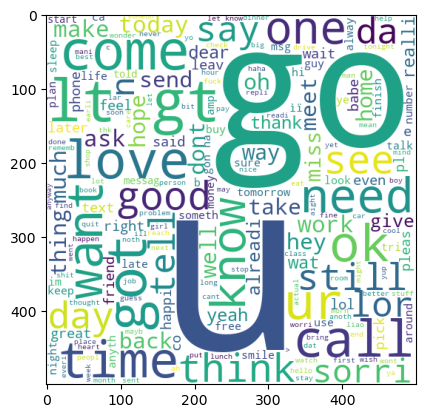

In [54]:
#creating wordcloud for the ham messages
ham_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

plt.imshow(ham_wc)

#creating list words that are lies in spams:

In [55]:
spam_corpus=[]
for msg in df[df['target']==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [56]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [57]:
#taking most 30 comman words in spam messages and creating datframe of them sequentially
from collections import Counter
mcs=pd.DataFrame(Counter(spam_corpus).most_common(30))
mcs #(most common spam word)

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


#plotting the graph 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

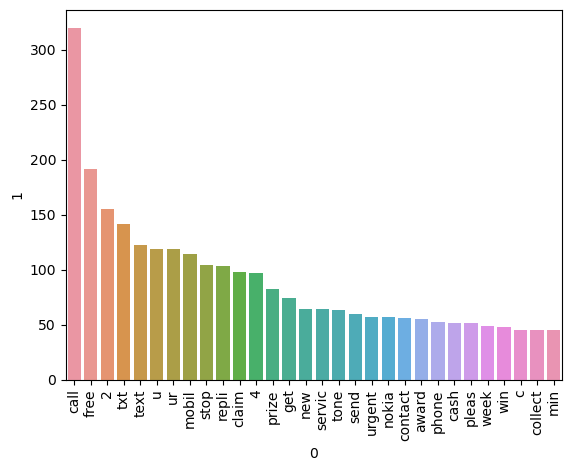

In [58]:
sns.barplot(x=mcs[0],y=mcs[1],data=mcs)
plt.xticks(rotation='vertical')

In [59]:
#similary for the ham messages:

ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
            for word in msg.split():
                ham_corpus.append(word)

In [60]:
len(ham_corpus)

35404

In [61]:
#creating data frame : #mah(most common ham):
mch=pd.DataFrame(Counter(ham_corpus).most_common(30))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

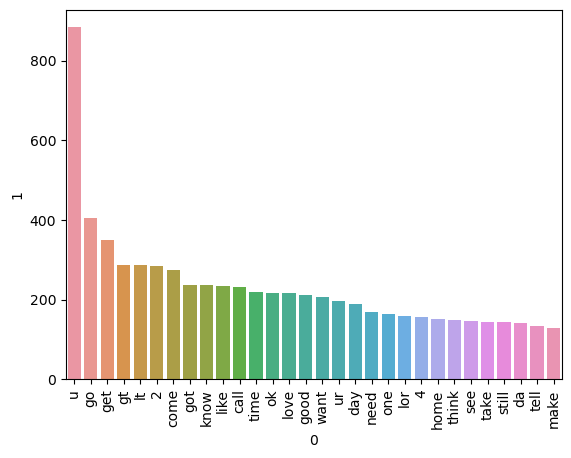

In [62]:
sns.barplot(x=mch[0],y=mch[1],data=mch)
plt.xticks(rotation='vertical')

# 4.Model Building:

In [63]:
#using CountVectorizer()

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [65]:
X= cv.fit_transform(df["transformed_text"]).toarray()

In [66]:
X.shape

(5169, 6708)

In [67]:
Y=df["target"].values

In [68]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [72]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [73]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [74]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [75]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


# using tfidf

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [77]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [78]:
X.shape

(5169, 3000)

In [79]:
Y=df["target"].values

In [80]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [81]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [82]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [83]:
# --------> mnb giving high precion(1) using tfidf 

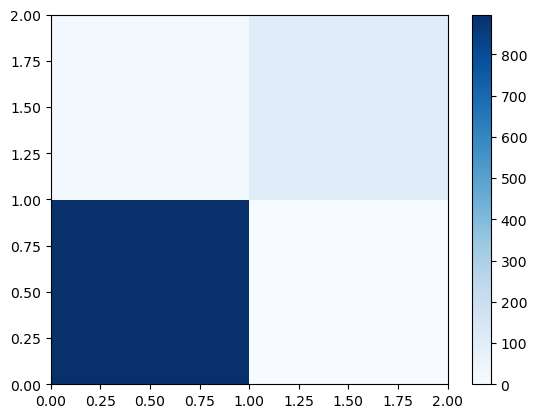

In [84]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred2)

# Plot confusion matrix
plt.pcolor(cm, cmap='Blues')
plt.colorbar()
plt.show()

In [85]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [86]:
# importing different classifieing models

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import GradientBoostingClassifier

In [87]:
svc = SVC (kernel='sigmoid', gamma=1.0)

knc = KNeighborsClassifier()

mnb=MultinomialNB() 

dtc= DecisionTreeClassifier(max_depth=5)

lrc= LogisticRegression(solver='liblinear', penalty='l1')

rfc=RandomForestClassifier(n_estimators=50, random_state=2)

abc=AdaBoostClassifier(n_estimators=50, random_state=2)
                         
bc= BaggingClassifier(n_estimators=50, random_state=2)

etc = ExtraTreesClassifier(n_estimators=58, random_state=2)

gbdt= GradientBoostingClassifier(n_estimators=50, random_state=2)

In [88]:
clfs={
    'SVC':svc,
    "knc":knc,
    "MNB":mnb,
    "DTC":dtc,
    "LRC":lrc,
    "RFC":rfc,
    "ADB":abc,
    "bc":bc,
    "etc":etc,
    "gbdt":gbdt
}

In [89]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision
    

In [90]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [91]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items(): 
    current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print(f"for {name} \n Accuracy:{current_accuracy}\n Precision:{current_precision}")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for SVC 
 Accuracy:0.9758220502901354
 Precision:0.9747899159663865
for knc 
 Accuracy:0.9052224371373307
 Precision:1.0
for MNB 
 Accuracy:0.9709864603481625
 Precision:1.0
for DTC 
 Accuracy:0.9303675048355899
 Precision:0.8173076923076923
for LRC 
 Accuracy:0.9584139264990329
 Precision:0.9702970297029703
for RFC 
 Accuracy:0.9758220502901354
 Precision:0.9829059829059829
for ADB 
 Accuracy:0.960348162475822
 Precision:0.9292035398230089
for bc 
 Accuracy:0.9584139264990329
 Precision:0.8682170542635659
for etc 
 Accuracy:0.9758220502901354
 Precision:0.9747899159663865
for gbdt 
 Accuracy:0.9468085106382979
 Precision:0.9191919191919192


In [92]:
#performance_df=pd.DataFrame({'algorithm':clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values('Precision',ascending=False)

In [93]:
#performance_df

In [94]:
# ------------> model improvement

In [95]:
#temp_df=pd.DataFrame({"algorithm":clfs.keys(),"Accuracy_maxft_3000":accuracy_scores,"Precision_maxft_3000":precision_scores}).sort_values('Precision_maxft_3000',ascending=False)

In [96]:
#performance_df.merge(temp_df,on="algorithm")

In [97]:
''' votinng classifier:
svc=SVC(kernel='sigmoid',gamma=0.1,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50 ,random_state=2)

from sklearn.ensemble import VotingClassifier'''

" votinng classifier:\nsvc=SVC(kernel='sigmoid',gamma=0.1,probability=True)\nmnb=MultinomialNB()\netc=ExtraTreesClassifier(n_estimators=50 ,random_state=2)\n\nfrom sklearn.ensemble import VotingClassifier"

In [98]:
#voting=VotingClassifier(estimators=[ ("svm",svc), ("nb",mnb), ("et",etc) ], voting='soft')

In [99]:
#voting.fit_transform(x_train,y_train)

In [100]:
#y_pred=voting.predict(x_test)
print("Accuracy : {accuracy_score(y_test,y_pred)},\n precision :{precision_score(y_test,y_pred)}")

Accuracy : {accuracy_score(y_test,y_pred)},
 precision :{precision_score(y_test,y_pred)}


In [101]:
'''# applying stacking
estimators=[ ("svm",svc), ("nb",mnb), ("et",etc) ]
final_estimator=RandomForestClassifier()'''

'# applying stacking\nestimators=[ ("svm",svc), ("nb",mnb), ("et",etc) ]\nfinal_estimator=RandomForestClassifier()'

In [102]:
#from sklearn.ensemble import StackingClassifier

In [103]:
#clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [104]:
'''clf.fit_transform(x_train,y_train)
y_pred=clf.predict(x_test)
print(f"Accuracy : {accuracy_score(y_test,y_pred)},\n precision :{precision_score(y_test,y_pred)}")'''

'clf.fit_transform(x_train,y_train)\ny_pred=clf.predict(x_test)\nprint(f"Accuracy : {accuracy_score(y_test,y_pred)},\n precision :{precision_score(y_test,y_pred)}")'

In [105]:
#as we see only naviebayes can able to give high perforrmance rather than the combine voting and stacking so we move ahead with nb model

In [106]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))